In [1]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
# python3 in my computer only uses the packages I installed when I point at the path, otherwise it doesn't work. 

from numpy import genfromtxt
data = genfromtxt('ecoli.csv', delimiter=',', usecols=range(1,8))
print(data)

[[ 0.49  0.29  0.48 ...,  0.56  0.24  0.35]
 [ 0.07  0.4   0.48 ...,  0.54  0.35  0.44]
 [ 0.56  0.4   0.48 ...,  0.49  0.37  0.46]
 ..., 
 [ 0.61  0.6   0.48 ...,  0.44  0.39  0.38]
 [ 0.59  0.61  0.48 ...,  0.42  0.42  0.37]
 [ 0.74  0.74  0.48 ...,  0.31  0.53  0.52]]


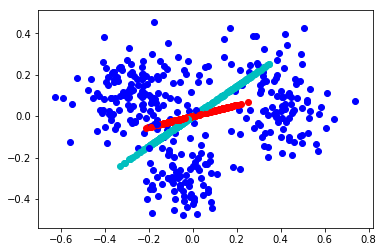

In [3]:
# perform PCA
def doPCA():
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(data)
    return pca

pca = doPCA()
first_pc = pca.components_[0]
second_pc = pca.components_[1]
transformed_data = pca.transform(data)

# Visualize data
for ii, jj in zip(transformed_data, data):
    import matplotlib.pyplot as plt
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], color='r')
    plt.scatter(second_pc[0]*ii[1], second_pc[1]*ii[1], color='c')
    plt.scatter(ii[0], ii[1], color='b')
plt.show()

Which localization sites can (at least roughly) be separated using
- i) only the first
- ii) only the second
- iii) the first and the second

principal component?

In [4]:
# This print statement should explain the 1st and 2nd principal components
print (pca.explained_variance_ratio_.cumsum())

[ 0.5161681  0.7603715]


These values explian the variance in the data for the 1st and 2nd principal components repectively. So if one is used, say 1st_pc (the red line in the plot), then only ~51% of the variance in the data is retained, but if the 1st and 2nd (cyan line in the plot) principla components are used, then ~76% of the variance in the data is retained.

I expect 100% retention of the variance in the data, if i set the n_components=n_features which is 7 in this dataset.